## Programming exercise 3  - 2D Controlled Quad

<img src="Drone2.png" width="400" height="400">

The given exercise will guide you in developing two-dimensional drone which can follow the trajectory described as an analytical function. 

The drone characterized only by two propellers located at a distance $l$ from the center of mass. It can generate a thrust by two propellers and can rotate along the center of mass by creating thrust difference between these two propellers. In this exercise, we will not calculate the torque by the propellers as it will be directed out of the plane of motion. 


The state can be described by next vector: $X = [z , y, \phi, \dot{z}, \dot{y},\dot{\phi}]$. Thus we will truck drones position in 2 dimension and its rotation along the $x$ axis, which is directed into the plane. 

In [1]:
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

import numpy as np 
import math
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import jdc
from ExerciseAnswers import Answers


pylab.rcParams['figure.figsize'] = 10, 10

In [2]:
class Drone_in_2d:
    
    def __init__(self,
                 k_f = 0.1, # value of the thrust coefficient
                 i = 0.1,   # moment of inertia around the x-axis
                 m = 1.0,#0.2,   # mass of the vehicle 
                 l = 0.15,  # a distance between the center of mass and the propeller axis
                ):
        
        self.k_f = k_f
        self.i = i
        self.l = l 
        self.m = m
        
        self.omega_1 = 0.0
        self.omega_2 = 0.0
        self.g = 9.81
        self.X = np.array([0.0,0.0,0.0,0.0,0.0,0.0])
        

The drone can move along the $z$ and $y$ axis. The acceleration along the $z$ axis is achieved by the mismatch of the vertical forces.  While the acceleration in the horizontal $y$ direction is achieved by creating a rolling angle which will create a net force along the horizontal axis. 
$$
\ddot{z} = g - \frac{k_f}{m}(\omega_1^2 + \omega_2^2) \cos(\phi) \\
\ddot{y} = \frac{k_f}{m}(\omega_1^2 + \omega_2^2) \sin(\phi)
$$
 
### _Direction:_ 
The given function will calculate the acceleration along $z$ and $y$ axis. 

In [5]:
%%add_to Drone_in_2d
@property
def z_dot_dot(self):
    # TODO:
    # Calculate the vertical component of the acceleration 
    a_z = self.g - self.k_f / self.m *(self.omega_1 **2 + self.omega_2 **2)  * math.cos(self.X[2])
    
    return a_z
    
    
@property    
def y_dot_dot(self):
    # TODO:
    # Calculate the horizontal component of the acceleration 
    a_y = self.k_f / self.m * (self.omega_1**2 + self.omega_2**2) * math.sin(self.X[2])
    
    return a_y
    
    

As mentioned above the drone can rotate around the center of mass by creating the difference between thrust generated by the left and right propellers. The total torque will be $\tau = (F_1 -F_2)l$.

### _Direction:_ 
Develop the function that will calculate the angular acceleration of the drone.

In [6]:
%%add_to Drone_in_2d
@property
def phi_dot_dot(self):
    # TODO:
    # Calculate the angular acceleration along the x-axis. 
    f1 = self.k_f * self.omega_1**2 
    f2 = self.k_f * self.omega_2**2 
    torque = (f1-f2) * self.l
    angular_acc = torque/self.i
    
    return np.array(angular_acc)

As the state vector is expressed as $X = [x , y, \phi, \dot{x}, \dot{y},\dot{\phi}]$. The time derivative of the state vector will be  $\dot{X} = [\dot{x} , \dot{y}, \dot{\phi}, \ddot{x}, \ddot{y},\ddot{\phi}]$.
### _Direction:_ 
Implement the method that will calculate the state vector $X$ after $dt$ time advance. 

In [20]:
%%add_to Drone_in_2d

def advance_state(self, dt):
    # TODO:
    # Calculate state vector after dt time 
    delta_y_dot = self.y_dot_dot * dt 
    self.X[3] += delta_y_dot 
    delta_z_dot = self.z_dot_dot * dt 
    self.X[4] += delta_z_dot 
    delta_phi_dot = self.phi_dot_dot * dt 
    self.X[5] += delta_phi_dot 
    
    self.X[0] += self.X[3] * dt 
    self.X[1] += self.X[4] * dt 
    self.X[2] += self.X[5] * dt 

    return self.X

The equation of motion:
given current $\phi$ angle is:
$$
\begin{align}
\ddot{z} &= g - k_f(\omega_1^2+\omega_2^2) \cos(\phi) \\
\ddot{y} &= k_f(\omega_1^2+\omega_2^2) \sin(\phi)\\
\ddot{\phi} &= \frac{l k_f}{I}(\omega_1^2 - \omega_2^2) 
\end{align}
$$

As you can see you have more questions than the unknowns. Thus the angle of inclination of the drone will be the dependent function. Thus you need to express $\phi$ as a function of the $x$ and $t$. After constraining the $\phi$ we can arrive at a linear equation for $\omega_1^2$ and $\omega_2^2$. 

But let us consider a simple case when there is no roll and only can move in a vertical direction. In this case, we can use the `set_rotors_angular_velocities` functions which we developed in the previous exercise. 

In [21]:
%%add_to Drone_in_2d

def set_rotors_angular_velocities(self,linear_acc):
    
    omega = math.sqrt(self.m * (-linear_acc + self.g) /(2 * self.k_f))
    
    self.omega_1 = omega
    self.omega_2 = omega
    
    return self.omega_1, self.omega_2
    

Similar to the previous exercise before executing flight we need to check that functions developed above produce a correct answer. Thus let us run through a series of cases and see if your answers coincide with ours. 

1. Let's calculate the rotor angular velocities which will result in stable hover (provided). 
2. Assume the $5^\circ$ rolling angle and increase of first propeller angular velocity by $\sqrt{1.1}$ and the second propellers angular velocity by $\sqrt{1.05}$. Calculate the vertical, horizontal and angular accelerations.


Obtaining the angular velocities for the level flight with 0 degree roll. _(In this case, we do not pay attention of the propeller angular velocity sign as it does not influence the dynamics)_

In [22]:
Drone_test= Drone_in_2d()

stable_omega_1,stable_omega_2 = Drone_test.set_rotors_angular_velocities(0.0)

print('stable flight is achieved at propeller angular velocities of ',stable_omega_1,'rad/sec')

stable flight is achieved at propeller angular velocities of  7.003570517957251 rad/sec


Setting the roll to a $5^\circ$ angle and angular velocity for the first propeller to $\sqrt{1.1}$ above the level flight value and angular velocity for the second propeller to $\sqrt{1.05}$ above the level flight value.

In [10]:
Drone_test.omega_1 = stable_omega_1 * math.sqrt(1.1)
Drone_test.omega_2 = stable_omega_2 * math.sqrt(1.05)
Drone_test.X[2] = 5*math.pi/180

vertical_acceleration = Drone_test.z_dot_dot
print('Increase in %5.2f'%math.sqrt(1.1),' of the first propeller angular velocity and %5.2f'%math.sqrt(1.05),
      ' increase of the second propeller velocity while having 5 degree roll will result in'
      ,'%5.2f'%vertical_acceleration, 'm/(s*s) vertical acceleration.' )

Answers.vertical_acceleration(Drone_test.m, Drone_test.k_f,Drone_test.g, Drone_test.X[2], 
                              Drone_test.omega_1, Drone_test.omega_2, vertical_acceleration)

Increase in  1.05  of the first propeller angular velocity and  1.02  increase of the second propeller velocity while having 5 degree roll will result in -0.70 m/(s*s) vertical acceleration.


'You calculated the vertical acceleration value correctly'

In [11]:
horizontal_acceleration = Drone_test.y_dot_dot
print('Increase in %5.2f'%math.sqrt(1.1),' of the first propeller angular velocity and %5.2f'%math.sqrt(1.05),
      ' increase of the second propeller velocity while having 5 degree roll will result in'
      ,'%5.2f'%vertical_acceleration, 'm/(s*s) horizontal acceleration.' )

Answers.horizontal_acceleration(Drone_test.m, Drone_test.k_f,Drone_test.g, Drone_test.X[2], 
                              Drone_test.omega_1, Drone_test.omega_2, horizontal_acceleration)

Increase in  1.05  of the first propeller angular velocity and  1.02  increase of the second propeller velocity while having 5 degree roll will result in -0.70 m/(s*s) horizontal acceleration.


'You calculated the vertical acceleration value correctly'

In [12]:
rolling_acceleration = Drone_test.phi_dot_dot
print('Increase in %5.2f'%math.sqrt(1.1),' of the first propeller angular velocity and %5.2f'%math.sqrt(1.05),
      ' increase of the second propeller velocity will result in'
      ,'%5.2f'%rolling_acceleration, 'rad/(s*s) angular acceleration.' )

Answers.rolling_acceleration(Drone_test.k_f, Drone_test.i, Drone_test.l,
                              Drone_test.omega_1, Drone_test.omega_2, rolling_acceleration)

Increase in  1.05  of the first propeller angular velocity and  1.02  increase of the second propeller velocity will result in  0.37 rad/(s*s) angular acceleration.


'You calculated the vertical acceleration value correctly'

# Following the vertical trajectory

In this section, we will generate the sinusoidal trajectory and will try to follow it by setting the angular velocities of the drone to achieve the desired acceleration.  
$$
z_{path}= 0.5 \cdot \cos(2t) - 0.5 \\
\ddot{z}_{path} = -2 \cdot \cos(2t)
$$


In [23]:
total_time = 3.0
dt = 0.01
t=np.linspace(0.0,total_time,int(total_time/dt))

z_path= 0.5*np.cos(2*t)-0.5
z_dot_dot_path= -2.0*np.cos(2*t)

In order to follow the path for each time instance, we will transfer the desired acceleration to the `set_rotors_angular_velocities` function which will get the propeller angular velocities. Next, we will obtain the updated state vector and save it in `drone_state_history`. Thus trucking the state vector evolution in time. 

In [28]:
Drone=Drone_in_2d()
drone_state_history = Drone.X

for i in range(t.shape[0]-1):
    
    # setting the propeller velocities for the given desired zddot 
    Drone.set_rotors_angular_velocities(z_dot_dot_path[i])
    
    # calculating the new state vector 
    drone_state = Drone.advance_state(dt)
    
    # generate a history of vertical positions for drone
    drone_state_history = np.vstack((drone_state_history, drone_state))

Comparing the planned path to the one that has been executed.

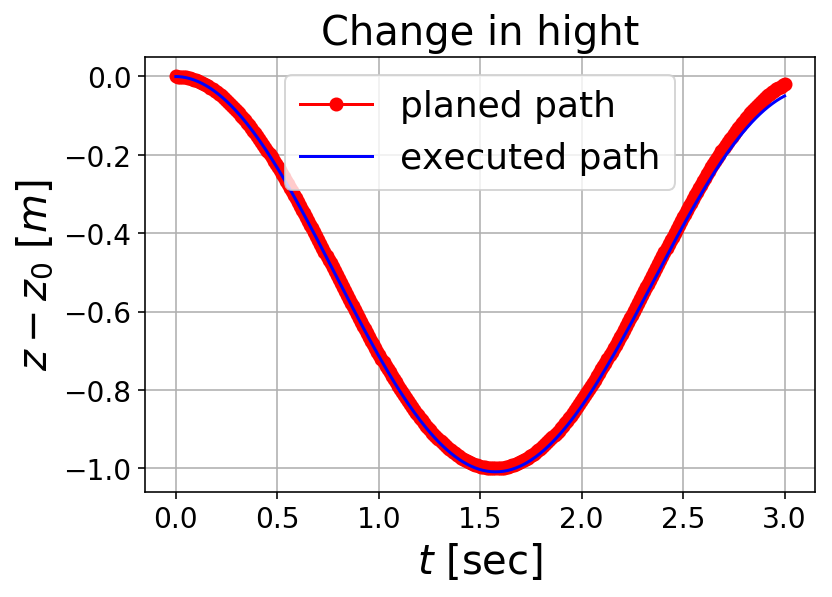

In [29]:
plt.plot(t,z_path,linestyle='-',marker='o',color='red')
plt.plot(t,drone_state_history[:,1],linestyle='-',color='blue')
plt.grid()
plt.title('Change in hight').set_fontsize(20)
plt.xlabel('$t$ [sec]').set_fontsize(20)
plt.ylabel('$z-z_0$ [$m$]').set_fontsize(20)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.legend(['planed path','executed path'],fontsize = 18)
plt.show()